In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract Red Entities from Image

In [2]:
original_img = cv2.imread('0001.jpg')
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

In [3]:
t = 15 #threshold acceptance
red_thresh = cv2.inRange(img, np.array([249 - t, 43 - t, 51 - t]), np.array([249 + t, 43 + t, 51 + t]))

In [4]:
combined_mask = red_thresh
combined_mask_inv = 255 - combined_mask

In [5]:
combined_mask_rgb = cv2.cvtColor(combined_mask_inv, cv2.COLOR_GRAY2RGB)
img = cv2.max(img, combined_mask_rgb)

# Extract Circles from Image

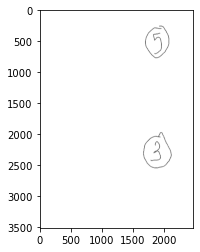

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.imshow(cimg)

In [7]:
#Mask to crop circles
height,width = img.shape
mask = np.zeros((height,width), np.uint8)

In [8]:
#Applying Hough Circle Transform
#img = cv2.Canny(img, 10, 175);
#plt.imshow(img, cmap="gray")
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=100,param2=30,minRadius=100,maxRadius=300)

In [9]:
# To Idenitify Circles in the Image

for i in circles[0,:]:
    i[2]=i[2]+4
    # Draw on mask
    cv2.circle(mask,(i[0],i[1]),int(i[2]),(255,255,255),thickness=-1)

<ipython-input-9-bca0162a2f94>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(mask,(i[0],i[1]),int(i[2]),(255,255,255),thickness=-1)


In [10]:
#to show masked images
masked_data = cv2.bitwise_and(img, img, mask=mask)

# Apply Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# Find Contour
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
crop = []
j = 0
for i in contours[0]:
    x,y,w,h = cv2.boundingRect(i)
    

# Crop masked_data
    crop.append(masked_data[y:y+h,x:x+w])

#Code to close Window
    cv2.imshow('Cropped Eye',crop[j])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    j+=1

# Digit Recognition

In [11]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical

In [12]:
model = keras.models.load_model("digit2")

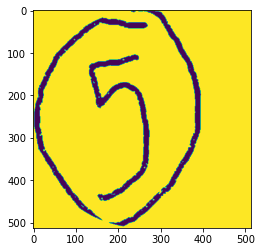

In [22]:
grey = crop[1]
image = grey
size = len(grey)
sum = 0
for i in range(size):
    for j in range(size):
        if (grey[i][j]==0):
            grey[i][j] = 255
plt.imshow(grey)

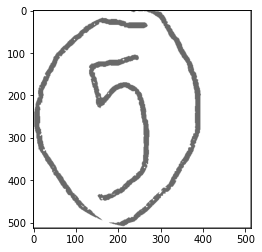




----------------Contoured Image--------------------


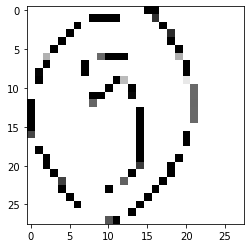

In [23]:
ret, thresh = cv2.threshold(grey.copy(), 220, 255, cv2.THRESH_BINARY)
#contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
x,y,w,h = cv2.boundingRect(grey)

# Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

# Cropping out the digit from the image corresponding to the current contours in the for loop
digit = thresh[y:y+h, x:x+w]
plt.imshow(grey, cmap="gray")
plt.show()
# Resizing that digit to (18, 18)
resized_digit = cv2.resize(digit, (28,28))

# Adding the preprocessed digit to the list of preprocessed digits
preprocessed_digits.append(resized_digit)
    
print("\n\n\n----------------Contoured Image--------------------")
np.set_printoptions(threshold=np.inf)
plt.imshow(resized_digit, cmap="gray")
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




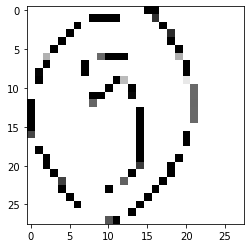



Final Output: 7

Prediction (Softmax) from the neural network:

 [[1.0524264e-08 2.1320562e-07 2.8893393e-20 9.5497379e-09 5.5877772e-12
  8.2382762e-21 8.4780046e-26 9.9997985e-01 1.9186396e-18 1.9991512e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




In [24]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [25]:
model2 = keras.models.load_model('digit')



---------------------------------------


=========PREDICTION============ 




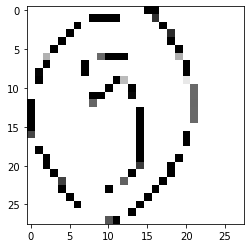



Final Output: 2

Prediction (Softmax) from the neural network:

 [[2.2211349e-02 2.0407172e-04 5.4567266e-01 5.7899870e-02 5.6093726e-03
  8.0372384e-03 1.8124749e-03 1.0731020e-02 3.4180105e-01 6.0209516e-03]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [26]:
for digit in preprocessed_digits:
    prediction = model2.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")